In [81]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import binary_fill_holes
from scipy.special import ellipe
from PIL import Image

In [82]:
#Specify path to nucleus segmentation mask
nucleus_seg_path = "/deep/group/aihc-bootcamp-winter2020/dlbcl/DLBCL-Morph/Cells/13901/1064/14.npy"

# Load and visualize nucleus segmentation mask

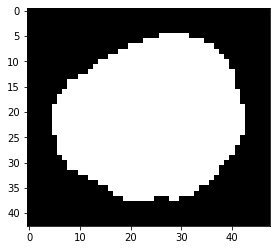

In [83]:
img = np.load(nucleus_seg_path)
#zero padding for clarity of visualization. The features in Cells/cell_shapes.csv are computed
#without zero-padding, so you can comment out the next line of code to reproduce those numbers
img = np.pad(img, 5) 
img = binary_fill_holes(img) #fill holes that sometimes appear inside the segmentation mask

mask = img.copy()
img = img.astype(np.uint8)
img[mask] = 255
plt.imshow(img, cmap='gray')
plt.show()

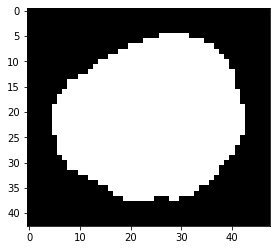

In [84]:
ret, thresh = cv2.threshold(img,127,255,0)
contours, hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]

plt.imshow(thresh, cmap='gray')
plt.show()

# Fit rectangle

Rectangle center: (23.749998092651367, 22.25)
Rectangle width: 37.314869, height: 31.306545
Rectangle rotation angle: -18.43494987487793


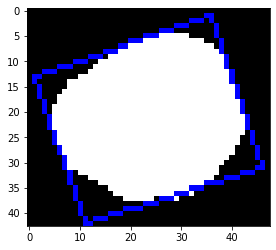

In [85]:
rect = cv2.minAreaRect(cnt)
(rectCoord1, rectCoord2, rotate_angle) = rect
box = cv2.boxPoints(rect)
box = np.int0(box)

rgb_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
cv2.drawContours(rgb_img,[box],0,(0,0,255),1)
plt.imshow(rgb_img)

print("Rectangle center:", rect[0])
print("Rectangle width: %.6f, height: %.6f" % (rect[1][0], rect[1][1]))
print("Rectangle rotation angle:", rect[2])

# Fit ellipse

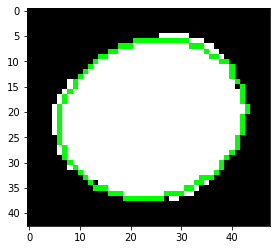

In [86]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

ellipse = cv2.fitEllipseDirect(cnt)  #(x, y), (major, minor), angle                                                            
ell = cv2.ellipse(rgb_img,ellipse,(0,255,0),1)
(ellpCtr_x, ellpCtr_y), (shortAxis, longAxis), angle = ellipse
plt.imshow(rgb_img)

In [87]:
# perimeter and area of ellipse                                                                                                            
a = longAxis / 2
b = shortAxis / 2
e = np.sqrt(1 - b**2 / a**2)  # eccentricity                                                                                       
perimt = 4 * a * ellipe(e*e)
area = np.pi * a * b

In [88]:
print("Ellipse centroid:", (ellpCtr_x, ellpCtr_y))
print("Major axis (longAxis) length: %.6f" % longAxis)
print("Minor axis (shortAxis) length: %.6f" % shortAxis)
print("Ellipse parimeter: %.6f" % perimt)
print("Ellipse area: %.6f" % area)

Ellipse centroid: (24.271310806274414, 21.33393669128418)
Major axis (longAxis) length: 37.061234
Minor axis (shortAxis) length: 30.641516
Ellipse parimeter: 106.586413
Ellipse area: 891.907870


# Convex hull area

In [89]:
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
print("Convex hull area: %.6f" % hull_area)

Convex hull area: 922.000000
